# Linear time invariant systems

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import librosa as lr

## Plotting a sine function with a stem plot

Text(0.5, 1.0, 'A signal')

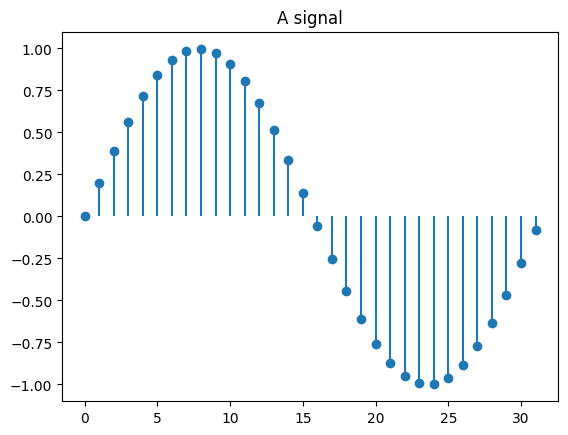

In [4]:
signal = [np.sin(phase) for phase in np.arange(0, np.pi*2, 0.2)]

plt.stem(signal, basefmt=" ")
plt.ylim([-1.1, 1.1])
plt.title("A signal")

## The unit impulse signal: the simplest, interesting signal

Text(0.5, 1.0, 'The impulse signal')

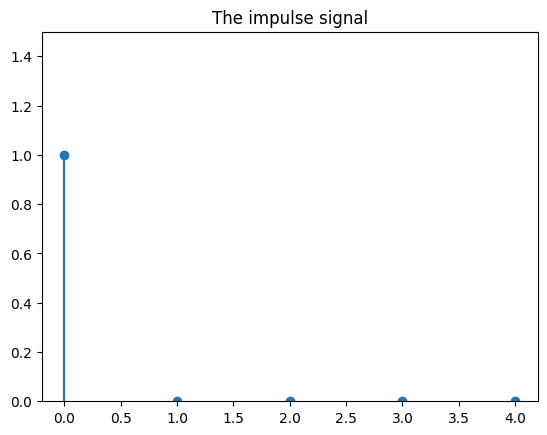

In [5]:
signal = np.array([1.0,0,0,0,0])

plt.stem(signal, basefmt=" ")
plt.ylim([0,1.5])
plt.title("The impulse signal")

## An example of an impulse response, the response of a system to the unit impulse signal

Text(0.5, 1.0, 'An impulse response')

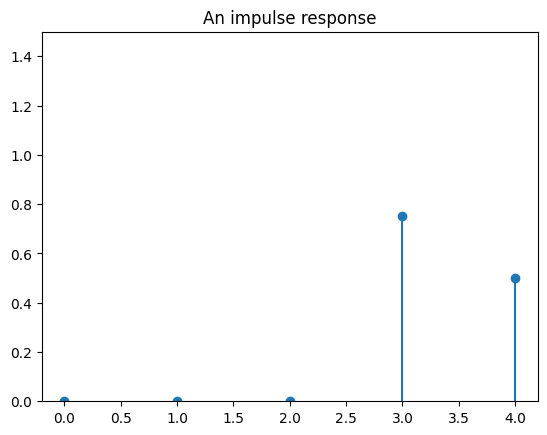

In [6]:
signal = np.array([0,0,0,0.75, 0.5])

plt.stem(signal, basefmt=" ")
plt.ylim([0,1.5])
plt.title("An impulse response")

# Homogeneity

Text(0.5, 1.0, 'Output')

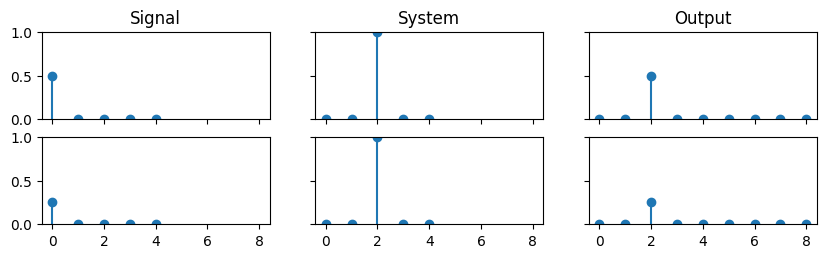

In [7]:
signal = np.array([0.5,0,0,0,0])
system = np.array([0,0,1,0,0])
output = np.convolve(system, signal)

signal2 = np.array([0.25,0,0,0,0])
output2 = np.convolve(system, signal2)


fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10, 2.5))

plt.ylim([0,1])

axs[0][0].stem(signal, basefmt=" ")
axs[0][1].stem(system, basefmt=" ")
axs[0][2].stem(output, basefmt=" ")

axs[1][0].stem(signal2, basefmt=" ")
axs[1][1].stem(system, basefmt=" ")
axs[1][2].stem(output2, basefmt=" ")


axs[0][0].set_title("Signal")
axs[0][1].set_title("System")
axs[0][2].set_title("Output")

# Additivity

Text(0.5, 1.0, 'Output')

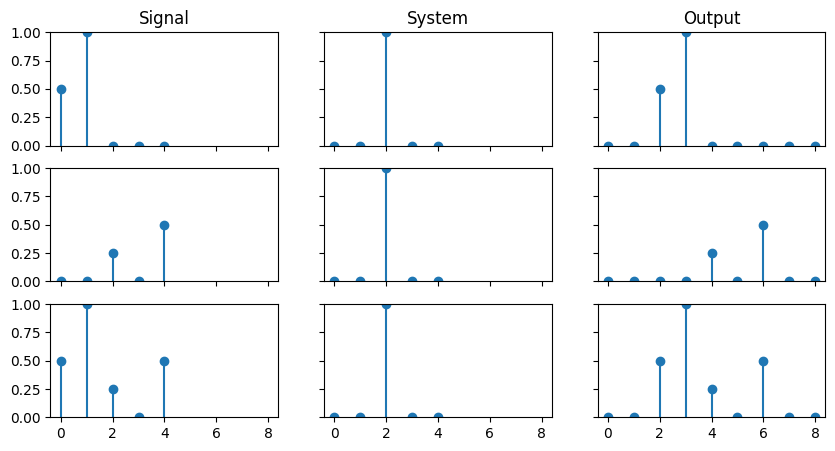

In [8]:
signal1 = np.array([0.5,1,0,0,0]) 
signal2 = np.array([0,0,0.25,0,0.5])
signal3 = signal1 + signal2

system = np.array([0,0,1,0,0])

output1 = np.convolve(system, signal1)
output2 = np.convolve(system, signal2)
output3 = np.convolve(system, signal3)

fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 5))

plt.ylim([0,1])

axs[0][0].stem(signal1, basefmt=" ")
axs[0][1].stem(system, basefmt=" ")
axs[0][2].stem(output1, basefmt=" ")

axs[1][0].stem(signal2, basefmt=" ")
axs[1][1].stem(system, basefmt=" ")
axs[1][2].stem(output2, basefmt=" ")

axs[2][0].stem(signal3, basefmt=" ")
axs[2][1].stem(system, basefmt=" ")
axs[2][2].stem(output3, basefmt=" ")

axs[0][0].set_title("Signal")
axs[0][1].set_title("System")
axs[0][2].set_title("Output")


# Shift invariance

Text(0.5, 1.0, 'Output')

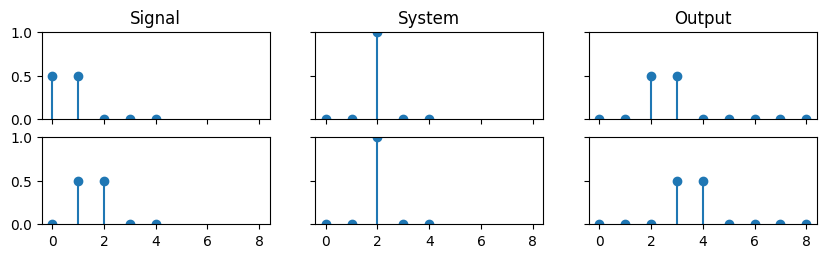

In [9]:
signal = np.array([0.5,0.5,0,0,0])
system = np.array([0,0,1,0,0])
output = np.convolve(system, signal)

signal2 = np.array([0,0.5,0.5,0,0])
output2 = np.convolve(system, signal2)


fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10, 2.5))

plt.ylim([0,1])

axs[0][0].stem(signal, basefmt=" ")
axs[0][1].stem(system, basefmt=" ")
axs[0][2].stem(output, basefmt=" ")

axs[1][0].stem(signal2, basefmt=" ")
axs[1][1].stem(system, basefmt=" ")
axs[1][2].stem(output2, basefmt=" ")


axs[0][0].set_title("Signal")
axs[0][1].set_title("System")
axs[0][2].set_title("Output")

## Convolving a system with a signal

In [11]:
def convolve(signal, system):
    res = np.zeros(len(signal) + len(system) - 1)
    for sample_ind in range(len(signal)):
        if (sample_ind % (44100/5) == 0):
            print(sample_ind)
        sample = signal[sample_ind]
        for system_ind in range(len(system)):
            output = sample * system[system_ind]
            res_ind = sample_ind + system_ind
            res[res_ind] = res[res_ind] + output
    return res


sig1 = [1.0]
sys1 = [0.0, 0.5, 0.25, 0.25, 0.5]

res = convolve(sig1, sys1)
res2 = np.convolve(sig1, sys1)
print(res)
print(res2)

0
[0.   0.5  0.25 0.25 0.5 ]
[0.   0.5  0.25 0.25 0.5 ]


## Convolving a longer signal with a real IR

In [13]:
# make sure these files exist!
signal1, sr = lr.load("./320952__kevcio__amen-break-f-180-bpm-16-bars.wav", sr=44100)
system1, sr = lr.load("./553495__mvrasseli__4-4-100bpm-streets-funky-loop.wav", sr=44100)

print("Signal length in seconds:", signal1.shape[0] / sr)
print("System (impulse respose) length in seconds", system1.shape[0] / sr)

Signal length in seconds: 21.40625850340136
System (impulse respose) length in seconds 19.2


Let's listen to the sytem and signal.

In [14]:
from IPython.display import Audio
audio_signal = Audio(data=signal1, rate=sr)
audio_signal

In [15]:
audio_system = Audio(data=system1, rate=sr)
audio_system

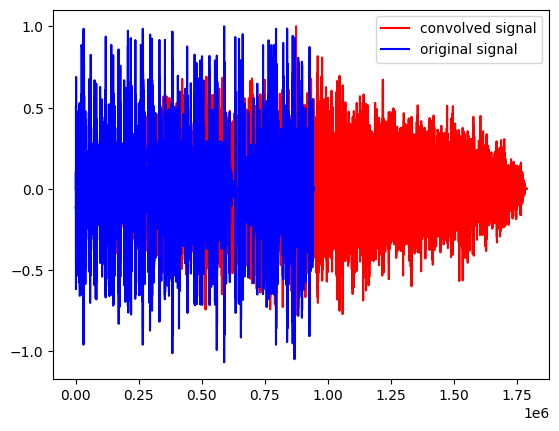

In [16]:
res = np.convolve(signal1, system1)

# plot
# normalise it
res = res / np.max(res) 
signal1 = signal1 / np.max(signal1)
plt.plot(res, 'r-', label='convolved signal')
plt.plot(signal1,'b-', label='original signal')
plt.legend(loc="upper right")

## want to hear it? 
audio = Audio(data=res, rate=sr)
audio